# Predictive Modelling with Support Vector Machine
In this jupyter notebook, we will understand the workings of a support vector machine algorithm to classify mushrooms as `edible` or `poisonuous`. 

> "_SVM constructs a hyperplane in multidimensional space to separate different classes._" - Sam Plati (Week 7 Lecture)

> *__Note__: The __business problem__, __dataset__ and __evaluation codes__ are the same as the ones used in understanding the decision tree algorithm last week.*

[![mushrooms-image](../images/different-types-of-mushrooms.jpg)](https://cleangreensimple.com/article/different-types-of-mushrooms/)
> Image source: [Clean Greens](https://cleangreensimple.com/article/different-types-of-mushrooms/)

---

**Lecturer: Marcos Bittencourt**<br></br>
**Module: DATA 2204 - Statistical Pred Modelling**
**Assignment: #5**

---

# Table of Contents:
* [1. Business Problem Description](#problem-description)
* [2. Feature Engineering and Exploratory Data Analysis](#eda)
    * [2.1 Dataset Information](#dataset-information)
    * [2.2 Loading Data](#loading-data)
    * [2.3 Exploratory Data Analysis](#eda-2)
* [3. Classifiers and Datasets](#class-data)
    * [3.1 Data Preparation](#data-prep)
    * [3.2 Model Training](#model-train)
* [4. Model Evaluation](#model-eval)
* [5. Conclusion](#conclusion)

---

<a id="problem-description"></a>
# 1. Business Problem Description
**Walmart Canada** is having troubles separating good mushrooms from the bad ones in **Toronto**. Current Walmart employees in Toronto do not have the knowledge to determine the "**edibility**" of mushrooms sourced from [local farmers](https://www.walmart.ca/en/ip/mushrooms-whole-white-your-fresh-market/6000196142665).

A group of Walmart stores in Toronto have decided to create a machine learning algorithm to classify mushrooms into two categories: `edible` or `poisonuous`. The algorithm will use numerous features of mushrooms to solve the binary classification problem.

The managers of the stores would like to see how well the support vector machine (SVM) algorithm does at classifying the dataset. They observed that the decision tree algorithm was overfitting the dataset and believe that the SVM model will provide more consistent and reliable results.

The following is the summary of the requirements:
1. Binary Classification of mushrooms
2. Use Suppport Vector Machine (SVM) algorithm.
3. Address the issue of overfitting.

[![walmart-screenshot](../images/walmart-mushrooms-screenshot.png)](https://www.walmart.ca/search?q=mushrooms&c=10019)
> Image source: [Walmart Canada](https://www.walmart.ca/)

Problem Statement:
> **Build a Support Vector Machine (SVM) Classification Model to classify mushrooms and explain the performance of the model.**

<a id="eda"></a>
# 2. Feature Engineering and Exploratory Data Analysis

<a id="dataset-information"></a>
## 2.1 Dataset Background Information
The dataset is available on the [UCI Machine Learning Repository website](https://archive.ics.uci.edu/ml/datasets/mushroom).

[![UCI-screenshot](../images/mushrooms-uci-screenshot.png)](https://archive.ics.uci.edu/ml/datasets/mushroom)

### Features of a Mushroom
[![mushroom-features](../images/mushroom-features.jpg)](https://medium.com/analytics-vidhya/mushroom-classification-edible-or-poisonous-9327a56c6fc9)

> Image source: [Analytics Vidhya](https://medium.com/analytics-vidhya/mushroom-classification-edible-or-poisonous-9327a56c6fc9)

### Independent Variables

1. `cap-shape`: bell=b, conical=c, convex=x, flat=f, knobbed=k,sunken=s 
1. `cap-surface`: fibrous=f, grooves=g, scaly=y, smooth=s 
1. `cap-color`: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y 
1. `bruises?`: bruises=t, no=f 
1. `odor`: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s 
1. `gill-attachment`: attached=a, descending=d, free=f, notched=n 
1. `gill-spacing`: close=c, crowded=w, distant=d 
1. `gill-size`: broad=b, narrow=n 
1. `gill-color`: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y 
1. `stalk-shape`: enlarging=e, tapering=t 
1. `stalk-root`: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=? 
1. `stalk-surface-above-ring`: fibrous=f, scaly=y, silky=k, smooth=s 
1. `stalk-surface-below-ring`: fibrous=f, scaly=y, silky=k, smooth=s 
1. `stalk-color-above-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
1. `stalk-color-below-ring`: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y 
1. `veil-type`: partial=p, universal=u 
1. `veil-color`: brown=n, orange=o, white=w, yellow=y 
1. `ring-number`: none=n, one=o, two=t 
1. `ring-type`: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z 
1. `spore-print-color`: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y 
1. `population`: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y 
1. `habitat`: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

### Dependent Variable
- `class`: edible=e, poisonous=p

<a id="loading-data"></a>
## 2.2 Loading Data

> *__Note__: A random_state of 100 is used for this notebook.*

In [25]:
#Load Libraries
import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import display, IFrame
import sweetviz as sv

from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.model_selection import RepeatedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, auc
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder

import os
import pathlib
import json
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Define location of the data
data_dir = '../data'
filename = 'mushrooms.csv'
data_path = os.path.join(data_dir, filename)

if not pathlib.Path(data_path).exists():
    raise FileNotFoundError('No file found at defined location.')

In [3]:
# Load data into a pandas DataFrame
data = pd.read_csv(data_path)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


<a id="eda-2"></a>
## 2.3 Exploratory Data Analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

> We can see that there are a total of 22 independent variables and 1 dependent variable (`class`)

In [5]:
data.describe().T

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


*Note: they are all categorical variables.*

> Here we can see information about each of those variables.
- `unique`: Number of categories in each variables.
- `top`: category with highest frequency in the dataset.
- `freq`: frequency of the `top` category.

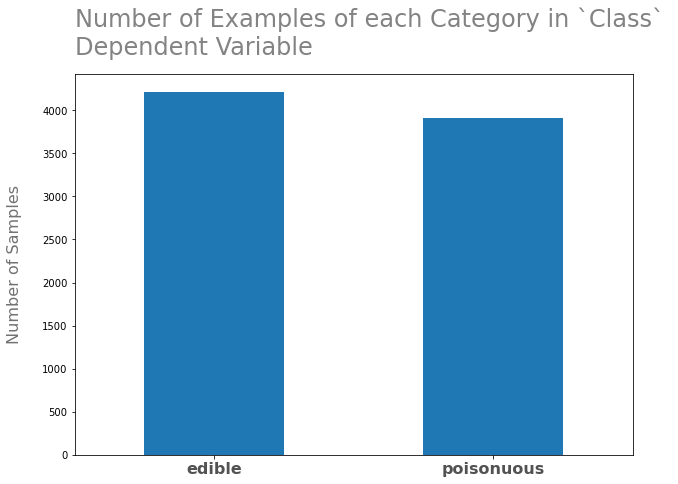

In [6]:
# Plot a graph to visualize the number of samples for each dependent variable category.
fig, ax = plt.subplots(figsize=(10,7))

# Count the number samples for each category and plot.
data["class"].replace({
    "e": "edible",
    "p":"poisonuous"
}).value_counts().plot(kind="bar", ax=ax)

# Other formatting settings.
ax.set_title("Number of Examples of each Category in `Class` \nDependent Variable",
             fontdict={"size": 24, "color": "#838383"}, pad=20, loc="left");

ax.set_ylabel("Number of Samples", fontdict={"size": 16, "color":"#727272"}, labelpad=20);
plt.xticks(fontsize=16, weight="bold", color="#525252", rotation=0);

In [7]:
# Convert target feature numerical data type
data_eda = data.copy()

data_eda['class'] = data_eda['class'].replace({
    'e': 0,
    'p': 1
})

if not pathlib.Path("SWEETVIZ_REPORT.html").exists():
    mushrooms_report = sv.analyze(data_eda, target_feat='class')
    mushrooms_report.show_html()

### Key insights from Sweetviz report

Certain variables have a very biased distribution of data among the categories present. These variables generally do not provide much information about the response variable (`class`). As the `class` variable has a well balanced set of examples, having a strongly biased variable in the dataset would mean less information about the `class`.

There were three (3) variables in particular that might provide more noise than information to our machine learning model.

1. `veil-type`
![veil-type](../images/eda-veil-type.png)
This variable provide no (zero) value in determining the `edibility` of a mushroom as all the values in the dataset for this variables are `p` (partial). This varaible can be removed from the dataset before training the model.

2. `veil-color`
![veil-color](../images/eda-veil-color.png)
`veil-color` has four (`4`) categories. However, **`98%`** of the values in the dataset fall under the `w` (white) category. Hence, the variable will provide more noise than information.

3. `gill-attachment`
![gill-attachment](../images/eda-gill-attachment.png)
This variable two (`2`) categories, but **`97%`** of the values in the dataset fall under the `f` (free) category.

> Let us look at the correlations between the variables.

Notice the relationships `class` has with other variables. This will show which features might be the most important in determining the `edibility` of a mushroom.

`odor` and `spore-print-color` are the top two features that provide information on `class`. The same can be observed in the associations table.

![correlation_matrix](../images/correlation-matrix.png)

**Note**: the three (`3`) variables that were expected to not given information on `class` variable, `veil-type`, `veil-color` and `gill-attachment`, are not in the top 14 variables that provide information on the `edibility` of mushrooms. 

![class-associations](../images/eda-class-associations.png)

<a id="class-data"></a>
# 3. Classifiers and Datasets
In this section, we will prepare the dataset by splitting into train and test sets. We will then train a decicion tree algorithm on the training data.

<a id="data-prep"></a>
## 3.1 Data Preparation
First we are going to remove the variables that were deemed to provide minimal information about the `class`

In [8]:
drop_cols = ['veil-type', 'veil-color', 'gill-attachment']
data2 = data.drop(drop_cols, axis=1)

- `x`: array of features.
- `y`: array of responses (or the values to be predicted).

In [9]:
# Define x and y variables for the algorithm
X = data2.drop('class', axis=1)
y = data2['class']

To get an accurate representation of how the model performs, the dataset is split into training and test sets. 

The dataset train-test split is 80-20. `80%` of the data is used to train the algorithm and `20%` will be used to test it.

> *__Note__: Later, a 5-fold cross-validation score will be used to evaluate the model's performance, which would mean that the training dataset is further split into train and validation datasets.*

In [10]:
# Splitting data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

As the cateogries are identified with `string` (alphabets) values, they need to be changed to `numerical` values before being passed on to train the model. To ensure no data leakage occurs between the train and test datasets, the datasets are first split into train and test sets. Then the train and test datasets are separately transformed.

In [11]:
# Converting categories into numbers
X_train_transformed = pd.get_dummies(X_train)
X_test_transformed = pd.get_dummies(X_test)

<a id="model-train"></a>
## 3.2 Model Training

In [12]:
# Defining and fitting a SVM instance
model1 = SVC(kernel='linear', random_state=100)
model1.fit(X_train_transformed, y_train)

SVC(kernel='linear', random_state=100)

<a id="model-eval"></a>
# 4. Model Evaluation


Estimator: SVC 1
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       826
  Poisonuous       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



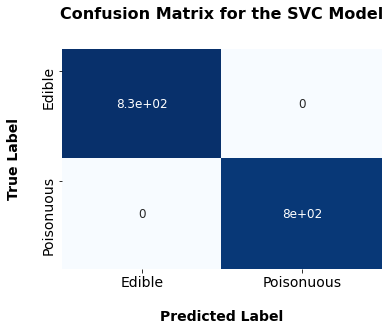

In [35]:
# Plot the confusion matrix for the Model
from helper_functions import plot_conf_mat

# Make predictions
predictions = model1.predict(X_test_transformed)

target_names=['Edible','Poisonuous']
print(f'\nEstimator: SVC 1') 

plot_conf_mat(confusion_matrix(y_test,predictions),
              figsize=(5,5), titles_list=["Confusion Matrix for the SVC Model"])

print(classification_report(y_test, predictions, target_names=target_names)) 

The algorithm was able to classsify the test data with `100%` accuracy! Exactly like the decision tree we looked at last week: the model has achieved a perfect score for all the metrics. We are again left with three possible reasons for this. However, from previous experience, we know the model is overfitting the dataset. Now that two different machine learning models performed exactly the same on the dataset, it would not be incorrect to assume that the dataset is simple, but has a small section of variables that create noise that make the model overfit the dataset.

Let us check if our hypothesis is true by studying the cross-validated scores and the learning curve.

> Note: some part of the helper function has been taken from [radroid's](https://github.com/radroid) [Breast Cancer Analysis repository](https://github.com/radroid/breast-cancer-wdbc/).

To understand how cross-validation works, please refer to last week's presentation.

In [14]:
# Tranform X to numerical categories
transformed_X = pd.get_dummies(X)

In [15]:
# Creating a list of metrics
metrics_list = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted','roc_auc']
performance_dict = {}

for metric in metrics_list:
    metric_score = cross_val_score(model1,
                                   transformed_X, y, cv=5, scoring=metric)
    print(metric_score)
    performance_dict.update({metric: metric_score})
    
performance_df = pd.DataFrame(performance_dict).round(3).T
performance_df.columns = [f"Fold {n}" for n in range(1, len(metric_score)+1)]
performance_df

[0.92123077 1.         1.         1.         0.79926108]
[0.93163579 1.         1.         1.         0.85192223]
[0.92123077 1.         1.         1.         0.79926108]
[0.92051512 1.         1.         1.         0.79316842]
[1.        1.        1.        1.        0.9923645]


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
accuracy,0.921,1.0,1.0,1.0,0.799
precision_weighted,0.932,1.0,1.0,1.0,0.852
recall_weighted,0.921,1.0,1.0,1.0,0.799
f1_weighted,0.921,1.0,1.0,1.0,0.793
roc_auc,1.000,1.0,1.0,1.0,0.992


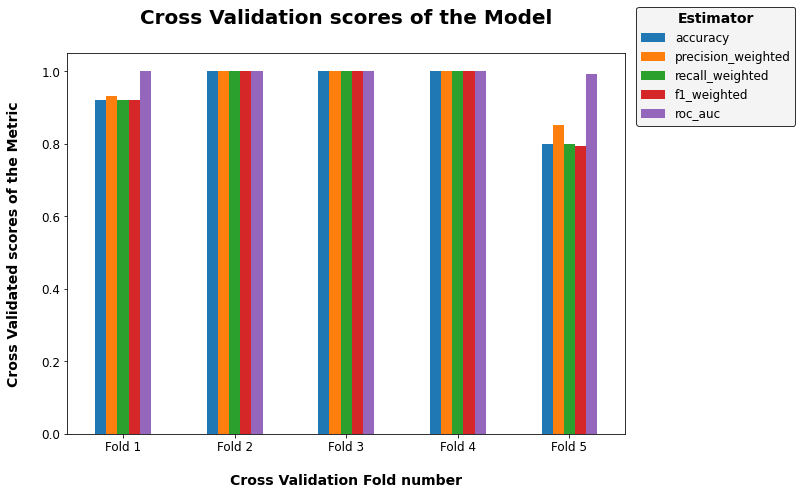

In [16]:
# Instantiating figure
fig, ax = plt.subplots(figsize=(10,7))

# plotting data
performance_df.T.plot.bar(ax=ax)

# Formatting title and axes
ax.set_title("Cross Validation scores of the Model", 
             fontdict={"fontsize":20, "fontweight":'bold'},
             pad=30)

ax.set_xlabel("Cross Validation Fold number", fontsize=14, fontweight='bold', labelpad=20)
ax.set_ylabel("Cross Validated scores of the Metric", 
              fontsize=14, fontweight='bold', labelpad=20)

plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)

# Formatting legend
leg = ax.legend(fontsize=12, loc=(1.02, 0.81), frameon=True)
leg.get_frame().set_color("#F2F2F2")
leg.get_frame().set_edgecolor("#000000")
leg.set_title("Estimator", prop={"size": 14, "weight": 'bold'})

> _**Note**: the above code is converted to a function that is saved in `helper_functions.py`._

The model has achieved a perfect score for all the metrics in the first three (`3`) folds. However, `Fold 1` and `Fold 5` show that there is some inconsistency in the model.

These inconsistencies confirm that model is overfitting the dataset.

> Reason:  The model is overfitting the data and a simpler model is required to ensure the model does not have a high variance.

Let's look at the learning curve to look for clues on overfitting.

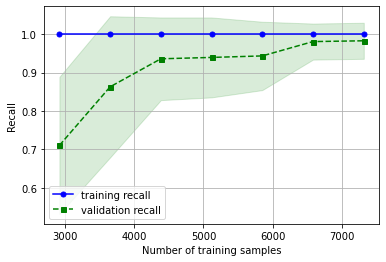

In [17]:
from helper_functions import plot_learning_curves

plot_learning_curves(model1, transformed_X, y)

The validation recall increases as the training samples are increased, however, the training recall is constant and at `1.0`. This confirms that the trained `Support Vector Classifier (SVC)` is **overfitting the data**.

The box plot below shows the variance in the validated weighted recall scores with a value of `0.94 +/- 0.08`. There is an outlier at around `0.8`, reiterating that the model is overfitting the data. 

Model Evaluation - Recall weighted
Model 0.94 +/- 0.08




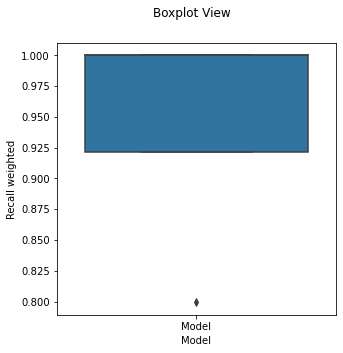

In [18]:
from helper_functions import plot_box_plot

plot_box_plot(model1, transformed_X, y)

As we know that the model is overfitting due to the large number of features. We will carry out two steps in an attempt to improve the robustness of the SVC model.

1. Increase the strength of regularization to train a simpler SVC model - reduce the value of hyperparameter `C`.
2. Feature selection - use Scikit-learn's `SelectFromModel` function to extract key features.

> _Feature selection will be carried out to simplify the dataset and observe a more consistent performance in the SVC model._

## Model Improvement

### Regularization

In [32]:
hyperparameters = {
    'C': np.linspace(0.001, 0.1, 100)
}

clf = RandomizedSearchCV(SVC(kernel='linear', random_state=100),
                         hyperparameters, cv=5, random_state=100, verbose=1, n_iter=20)
search = clf.fit(X_train_transformed, y_train)
search.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 0.063}


Estimator: SVC 1
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       826
  Poisonuous       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



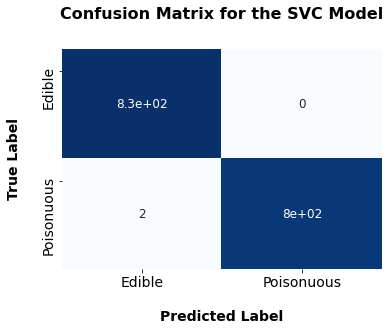

In [36]:
# Plot the confusion matrix for the Model
from helper_functions import plot_conf_mat

# Make predictions
predictions = search.best_estimator_.predict(X_test_transformed)

target_names=['Edible','Poisonuous']
print(f'\nEstimator: SVC 1') 

plot_conf_mat(confusion_matrix(y_test,predictions),
              figsize=(5,5), titles_list=["Confusion Matrix for the SVC Model"])

print(classification_report(y_test, predictions, target_names=target_names)) 

The model has achieved a perfect as it can be seen on the classification report and the confusion matrix. Only two samples were false positives.

Regularized SVC Learning Curve


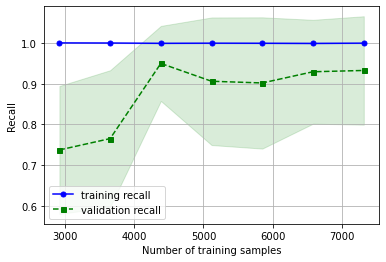

Model Evaluation - Recall weighted
Regularized SVC 0.86 +/- 0.18




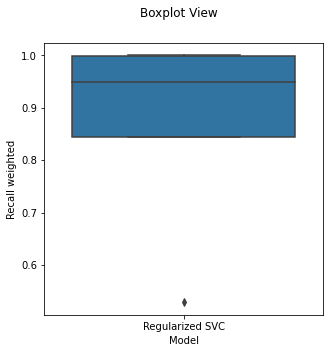

######### Averaged Cross Validation Scores ##########
Accuracy score:             86.46%
Weighted Precision score:   91.92%
Weighted Recall score:      86.46%
Weighted F1 score:          83.96%
ROC Area Under Curve:       0.971
Model evaluation complete.


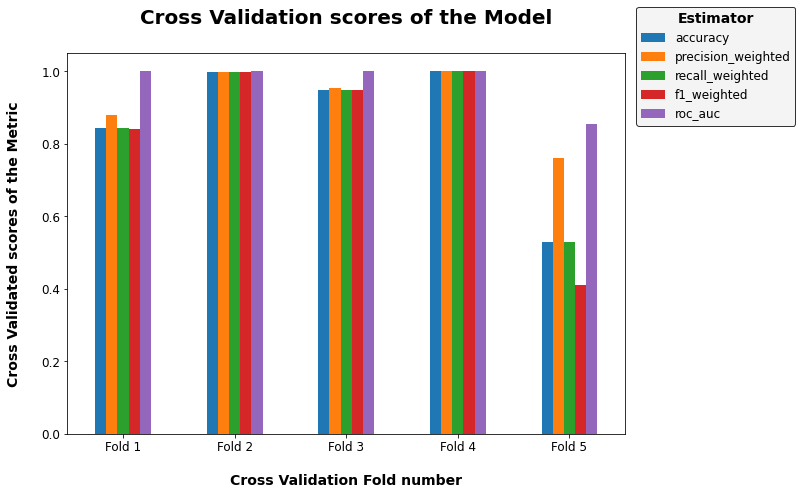

In [33]:
full_model_evaluation(search.best_estimator_, transformed_X, y, model_name='Regularized SVC')

Regularization brings changes to the performance of the model, but the inconsistency is still present and the comments on overfitting observed in the baseline model are still present.

In fact, the model's performance on `Fold 5` has worsened compared to baseline model. Let's carry out feature selection to see if that brings any changes to the model.

### Feature Selection

In [100]:
# Next Steps - Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(model1, prefit=True)
feature_idx = model.get_support()
feature_name = X_train_transformed.columns[feature_idx]

print(f'There are {len(feature_name)} key features out of {len(X_train_transformed.columns)} total')

There are 37 key features out of 110 total


The number of features have been reduced to `37` from `110`. Let's train a new SVC model with only these 37 features and observe its performance.

In [101]:
pprint(list(feature_name))

['bruises_f',
 'bruises_t',
 'odor_a',
 'odor_c',
 'odor_f',
 'odor_l',
 'odor_n',
 'odor_p',
 'odor_s',
 'odor_y',
 'gill-spacing_c',
 'gill-spacing_w',
 'gill-size_b',
 'gill-size_n',
 'gill-color_b',
 'stalk-shape_e',
 'stalk-shape_t',
 'stalk-root_b',
 'stalk-root_e',
 'stalk-root_r',
 'stalk-surface-above-ring_f',
 'stalk-surface-above-ring_k',
 'stalk-surface-above-ring_s',
 'stalk-surface-below-ring_y',
 'stalk-color-below-ring_n',
 'ring-number_o',
 'ring-number_t',
 'ring-type_f',
 'ring-type_p',
 'spore-print-color_k',
 'spore-print-color_n',
 'spore-print-color_r',
 'spore-print-color_u',
 'population_c',
 'habitat_g',
 'habitat_m',
 'habitat_w']


Therefore, the following variables are of highest importance:
1. `bruises`
2. `odor`
3. `gill-spacing`
3. `gill-size`
5. `gill-color`
6. `stalk-shape`
7. `stalk-root`
8. `stalk-surface-above-ring`
9. `stalk-color-below-ring`
10. `ring-number`
11. `ring-type`
12. `spore-print-color`
13. `population`
14. `habitat`

In [102]:
imp_features = [
    'bruises',
    'odor',
    'gill-spacing',
    'gill-size',
    'gill-color',
    'stalk-shape',
    'stalk-root',
    'stalk-surface-above-ring',
    'stalk-color-below-ring',
    'ring-number',
    'ring-type',
    'spore-print-color',
    'population',
    'habitat'
]

In [103]:
# Setting parameters
model2 = SVC(kernel='linear', random_state=100)

X_train_mod = X_train_transformed[feature_name]
X_test_mod = X_test_transformed[feature_name]

model2.fit(X_train_mod,y_train)

SVC(kernel='linear', random_state=100)


Estimator: SVC Feature Selected
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       826
  Poisonuous       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



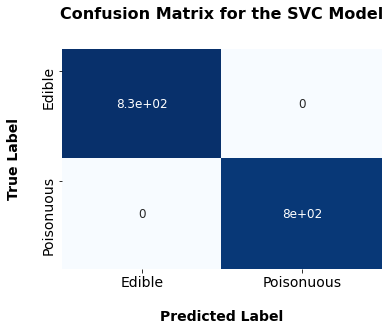

In [104]:
# Make predictions
predictions = model2.predict(X_test_mod)

target_names=['Edible','Poisonuous']
print(f'\nEstimator: SVC Feature Selected') 

# Plot the confusion matrix for the Model
plot_conf_mat(confusion_matrix(y_test,predictions),
              figsize=(5,5), titles_list=["Confusion Matrix for the SVC Model"])

# print classfication report
print(classification_report(y_test, predictions, target_names=target_names)) 

The performance of the SVC model did not change with the reduction in features. We could further reduce the number of features by selecting features with the `top 10` absolute coefficients.

> *__Note__: It is important that we consider the absolute coefficients as some coefficients can have an inverse relationship with the response variable. Hence, removing those negatives might have adverse effects on the model's performance. Hence, the variables with the top 10 **absolute** coefficients will be used to create our final model.*

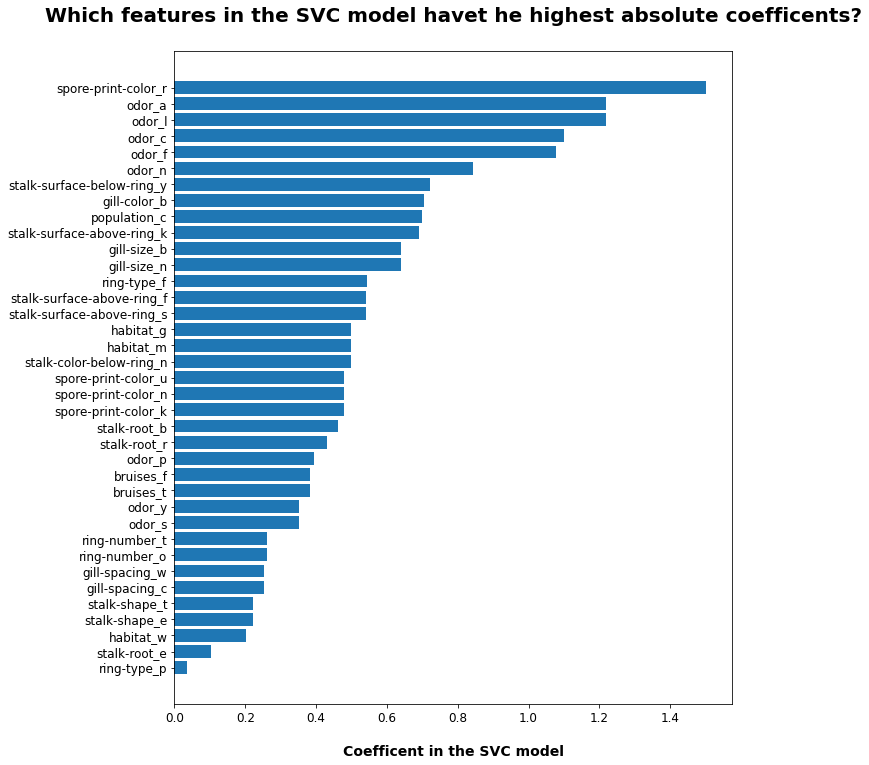

In [105]:
def f_importances(coef, names):
    imp = abs(coef)
    imp,names = zip(*sorted(zip(imp,names)))
    
    # Instantiating figure
    fig, ax = plt.subplots(figsize=(10,12))

    # Formatting title and axes
    ax.set_title("Which features in the SVC model havet he highest absolute coefficents?", 
                 fontdict={"fontsize":20, "fontweight":'bold'},
                 pad=30)

    ax.set_xlabel("Coefficent in the SVC model", fontsize=14, fontweight='bold', labelpad=20)

    plt.xticks(fontsize=12)
    
    ax.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names, fontsize=12)
    plt.show()

f_importances(model2.coef_[0], feature_name)

In [141]:
# Get values with coeffienct greater than 0.4
high_abs_coef = {name: [coef] for name, coef in zip(feature_name, model2.coef_[0])}
high_abs_coef, len(high_abs_coef)

({'odor_a': [-1.2178679581032097],
  'odor_c': [1.101382738228562],
  'odor_f': [1.0770853542016592],
  'odor_l': [-1.2178346146749748],
  'odor_n': [-0.8419453168975554],
  'gill-size_b': [-0.6404047068012904],
  'gill-size_n': [0.640404706801289],
  'gill-color_b': [0.7052969809739726],
  'stalk-surface-above-ring_k': [0.6918851697008572],
  'stalk-surface-below-ring_y': [0.7220419014223258],
  'spore-print-color_r': [1.500952306233362],
  'population_c': [0.7002090365238507]},
 12)

In [147]:
# Get top 10 features with the highest coefficients
imp_features = pd.DataFrame(high_abs_coef).T.abs()
imp_features.columns = ['coefficient']
top10 = imp_features.sort_values(by='coefficient', ascending=False).iloc[:10]
top10

,coefficient
spore-print-color_r,1.500952
odor_a,1.217868
odor_l,1.217835
odor_c,1.101383
odor_f,1.077085
odor_n,0.841945
stalk-surface-below-ring_y,0.722042
gill-color_b,0.705297
population_c,0.700209
stalk-surface-above-ring_k,0.691885


In [148]:
topN = [
    'spore-print-color',
    'odor',
    'stalk-surface-below-ring',
    'gill-color',
    'population',
    'stalk-surface-above-ring'
]

Let us re-train a SVC model with the new features and evaluate its performance.

In [149]:
# Setting parameters
model3 = SVC(kernel='linear', random_state=100)

# X_train_mod2 = X_train_transformed[top10.index]
# X_test_mod2 = X_test_transformed[top10.index]

X_train_mod2 = pd.get_dummies(X_train[topN])
X_test_mod2 = pd.get_dummies(X_test[topN])

model3.fit(X_train_mod2,y_train)

SVC(kernel='linear', random_state=100)


Estimator: SVC Feature Selected
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       826
  Poisonuous       1.00      1.00      1.00       799

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



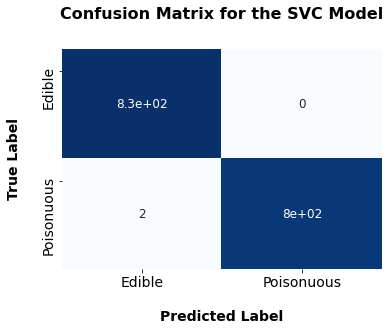

In [150]:
# Make predictions
predictions = model3.predict(X_test_mod2)

target_names=['Edible','Poisonuous']
print(f'\nEstimator: SVC Feature Selected') 

# Plot the confusion matrix for the Model
plot_conf_mat(confusion_matrix(y_test,predictions),
              figsize=(5,5), titles_list=["Confusion Matrix for the SVC Model"])

# print classfication report
print(classification_report(y_test, predictions, target_names=target_names)) 

SVC Feature Selected Learning Curve


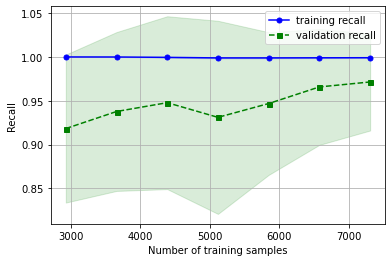

Model Evaluation - Recall weighted
SVC Feature Selected 0.93 +/- 0.10




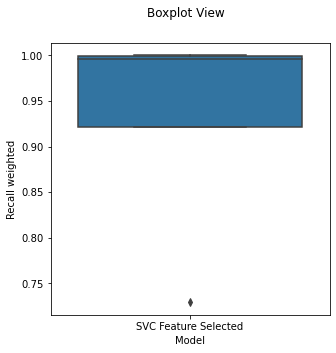

######### Averaged Cross Validation Scores ##########
Accuracy score:             92.90%
Weighted Precision score:   95.08%
Weighted Recall score:      92.90%
Weighted F1 score:          92.54%
ROC Area Under Curve:       0.998
Model evaluation complete.


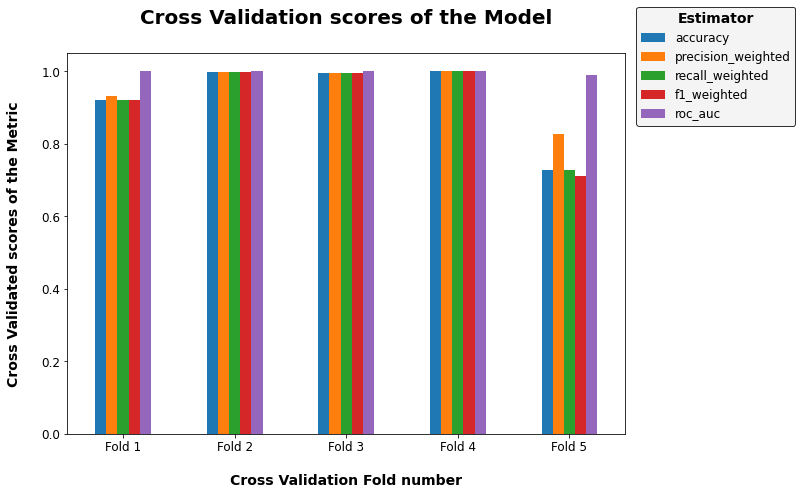

In [152]:
full_model_evaluation(model3, transformed_X[X_train_mod2.columns], y, model_name = 'SVC Feature Selected')

Though the performance of this decision is more realistic, the overall performance is good for a baseline model. 

**Learning Curve**
The learning curve follows an ideal structure and have low variance when trained on the full dataset, however, the bias in the model is high.

**Weighted Recall - Box Plot**
The range of the box plot is wide, showing that there 

The F1 scores for the decision tree with a depth of `5` instead of `8` are `90%` for `edible` and `86%` for poisonuous. This is a simpler model with a very high recall of `100%` for `edible` mushrooms.


Another way to simplify the model is by feature selection.

<a id="conclusion"></a>
# 5. Conclusion